In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns


# TASK 3: FEATURE ENGINEERING

In [94]:
train = pd.read_csv('C:/Users/Admin/train.csv', index_col = 0)
history_data = pd.read_csv('C:/Users/Admin/hist_data.csv', index_col = 0)



In [3]:
def calculateAndPlotMissingData(data):
    total_data = len(data)
    total_miss = data.isnull().sum()
    percent_missing = total_miss*100/total_data
    missing_data = pd.concat(
      (total_miss,percent_missing),
      axis = 1,
      keys =['Missing value','Percentage missing value']).sort_values('Percentage missing value',ascending = True)
    missing_data = missing_data[missing_data['Percentage missing value'] != 0]
    return missing_data

In [4]:
missing_data = calculateAndPlotMissingData(train)

In [5]:
missing_data

,Missing value,Percentage missing value
pow_max,2,0.019660
margin_gross_pow_ele,4,0.039320
margin_net_pow_ele,4,0.039320
net_margin,6,0.058980
origin_up,50,0.491497
forecast_discount_energy,70,0.688096
forecast_price_energy_p1,70,0.688096
forecast_price_energy_p2,70,0.688096
forecast_price_pow_p1,70,0.688096
channel_sales,2777,27.297749


Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year

In [95]:
mean_year = history_data.groupby(["id"]).mean().reset_index()
mean_year

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [96]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
"price_p2_var": "mean_year_price_p2_var",
"price_p3_var": "mean_year_price_p3_var",
"price_p1_fix": "mean_year_price_p1_fix",
"price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]
features = mean_year
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


# FILL NA

In [97]:
for col_name in train.columns[2:]:
    if train[col_name].dtypes == 'object':
        train[col_name].fillna('Missing', inplace=True)
    else:
        train[col_name].fillna(train[col_name].mean(), inplace=True)
train = train.drop(['campaign_disc_ele'],axis=1)

In [99]:
categories_activity = pd.DataFrame(train["activity_new"].value_counts())
categories_activity

,activity_new
Missing,7549
kkklcdamwfafdcfwofuscwfwadblfmce,254
ckfxocssowaeipxueikxcmaxdmcduxsa,106
cwofmuicebbcmiaaxufmfimpowpacobu,91
fmwdwsxillemwbbwelxsampiuwwpcdcb,87
...,...
fodmmlekiamkemipdukmkkpmdecbbabb,1
kackmuikblemiplimmldfpdsobmuwkac,1
sfeipispoikpxosepasemiiwclmebiei,1
kussomukpladumwscxeuuwbeoauibafa,1


In [100]:
 #Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["activity_new"] <= 75].index)
# Replace them with `null_values_categories`
train["activity_new"]=train["activity_new"].replace(to_replace,"Missing")
train["activity_new"].unique()

array(['Missing', 'kkklcdamwfafdcfwofuscwfwadblfmce',
       'ckfxocssowaeipxueikxcmaxdmcduxsa',
       'wxemiwkumpibllwklfbcooafckufkdlm',
       'cwofmuicebbcmiaaxufmfimpowpacobu',
       'fmwdwsxillemwbbwelxsampiuwwpcdcb'], dtype=object)

# GET DUMMIES FOR CATEGORICAL VARIABLE

In [101]:
cat_cols = train.select_dtypes('object').columns
cat_cols

Index(['id', 'activity_new', 'channel_sales', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal', 'has_gas',
       'origin_up'],
      dtype='object')

In [103]:
train_data_dummies = [pd.get_dummies(train['activity_new'], prefix = 'activity_new', prefix_sep = ':'),
                     pd.get_dummies(train['channel_sales'], prefix = 'channel_sales', prefix_sep = ':'),
                     pd.get_dummies(train['has_gas'], prefix = 'has_gas', prefix_sep = ':'),
                     pd.get_dummies(train['origin_up'], prefix = 'origin_up', prefix_sep = ':')]
train_data_dummies = pd.concat(train_data_dummies, axis = 1)
                    

In [104]:
train  = pd.concat([train, train_data_dummies], axis = 1)

In [105]:
train.columns.values

array(['id', 'churn', 'activity_new', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up',
       'pow_max', 'activity_new:Missing',
       'activity_new:ckfxocssowaeipxueikxcmaxdmcduxsa',
       'activity_new:cwofmuicebbcmiaaxufmfimpowpacobu',
       'activity_new:fmwdwsxillemwbbwelxsampiuwwpcdcb',
       'activity_new:kkklcdamwfafdcfwofuscwfwadblfmce',
       'activity_new:wxemiwkumpibllwklfbcooafckufkdlm',
       'channel_sales:Missing',


In [106]:
train.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)
train.drop(columns=["activity_new:Missing", "channel_sales:Missing", "origin_up:Missing"],inplace=True)
train.drop(columns=["has_gas"], inplace = True)

# CREATE VARIBLE ABOUT DATE

In [107]:
train["date_modif_prod"] 

1        2015-11-01
2        2009-08-21
3        2010-04-16
4        2010-03-30
6        2010-01-13
            ...    
16091    2015-05-08
16092    2012-08-27
16093    2012-02-08
16094    2012-08-30
16095    2009-12-18
Name: date_modif_prod, Length: 10173, dtype: object

In [108]:
def no_of_month (reference_date, dataframe, column):
    dataframe[column]= pd.to_datetime(dataframe[column], errors='coerce')
    delta = reference_date - dataframe[column]
    months = (delta / np.timedelta64(1, "M")).astype(int)
    return months

In [109]:
reference_date = datetime.datetime(2016,1,1)

In [110]:
train["months_activ"] = no_of_month(reference_date, train, "date_activ")
train["months_to_end"] = -no_of_month(reference_date, train, "date_end")
train["months_modif_prod"] = no_of_month(reference_date, train, "date_modif_prod")
train["months_renewal"] = no_of_month(reference_date, train, "date_renewal")

In [111]:
train.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal","date_first_activ"],inplace=True)

In [112]:
train

,id,churn,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,...,has_gas:t,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,months_activ,months_to_end,months_modif_prod,months_renewal
1,24011ae4ebbe3035111d65fa7c15bc57,1,0,54946,0,114.964827,114.964827,1890.684938,53.48847,0.00,...,1,0,0,0,1,0,30,5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,114.964827,114.964827,1890.684938,53.48847,189.95,...,0,0,1,0,0,0,76,7,76,4
3,764c75f661154dac3a6c254cd082ea7d,0,544,0,0,114.964827,114.964827,1890.684938,53.48847,47.96,...,0,0,1,0,0,0,68,3,68,8
4,bba03439a292a1e166f80264c16191cb,0,1584,0,0,114.964827,114.964827,1890.684938,53.48847,240.04,...,0,0,1,0,0,0,69,2,69,9
6,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,114.964827,114.964827,1890.684938,53.48847,445.75,...,0,0,1,0,0,0,71,2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,32270,47940,0,114.964827,114.964827,1890.684938,53.48847,4648.01,...,1,0,0,0,1,0,43,4,7,19
16092,d0a6f71671571ed83b2645d23af6de00,1,7223,0,181,68.640000,68.640000,1254.650000,15.94000,631.69,...,0,0,0,0,1,0,40,7,40,4
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,1844,0,179,114.964827,114.964827,1890.684938,53.48847,190.39,...,0,0,0,0,1,0,46,1,46,10
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,131,0,0,114.964827,114.964827,1890.684938,53.48847,19.34,...,0,0,0,0,1,0,40,7,40,4


# IDENTIFY & REMOVE OUTLIER ( BUT I REMOVE FROM TASk 2 already)


In [22]:
def _find_outliers_iqr(dataframe, column):
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    outliers = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape
    number = print( column, "has ", removed[0], " outliers")
    return number

In [23]:
def _remove_outliers_iqr(dataframe, column):
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    outliers = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape
    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
    (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe

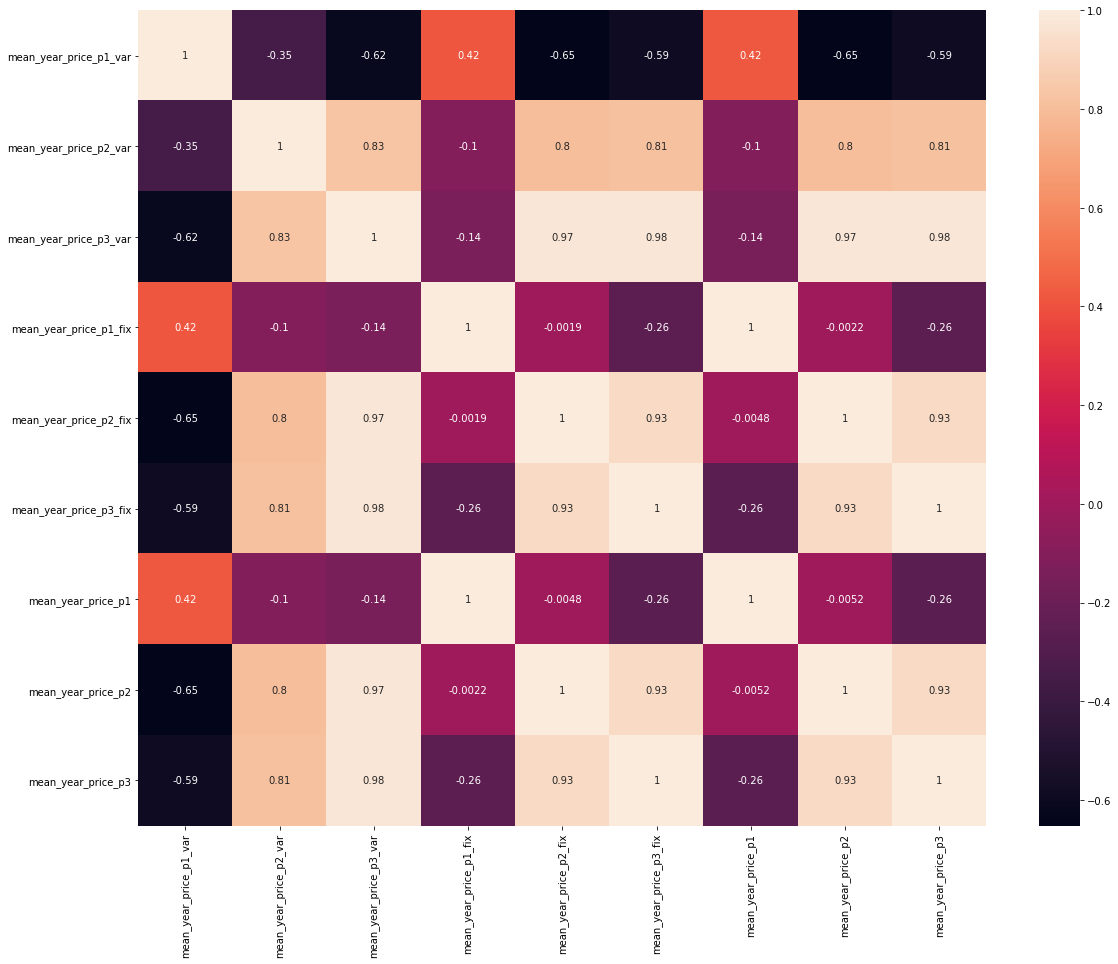

In [24]:
correlation = features.corr()
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [25]:
#CORRELATION TEST
# Top_features = correlation[abs(correlation['mean_year_price_p1']>0.5)].index

# print(Top_features)

Index(['mean_year_price_p1_fix', 'mean_year_price_p1'], dtype='object')


In [26]:
# Plot correlation
# correlation = train.corr()
# correlation

In [27]:
# # Plot correlation
# plt.figure(figsize=(20,18))
# sns.heatmap(correlation, xticklabels=correlation.columns.values,
# yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# # Axis ticks size
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()

In [113]:
train

,id,churn,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,...,has_gas:t,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,months_activ,months_to_end,months_modif_prod,months_renewal
1,24011ae4ebbe3035111d65fa7c15bc57,1,0,54946,0,114.964827,114.964827,1890.684938,53.48847,0.00,...,1,0,0,0,1,0,30,5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,114.964827,114.964827,1890.684938,53.48847,189.95,...,0,0,1,0,0,0,76,7,76,4
3,764c75f661154dac3a6c254cd082ea7d,0,544,0,0,114.964827,114.964827,1890.684938,53.48847,47.96,...,0,0,1,0,0,0,68,3,68,8
4,bba03439a292a1e166f80264c16191cb,0,1584,0,0,114.964827,114.964827,1890.684938,53.48847,240.04,...,0,0,1,0,0,0,69,2,69,9
6,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,114.964827,114.964827,1890.684938,53.48847,445.75,...,0,0,1,0,0,0,71,2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,32270,47940,0,114.964827,114.964827,1890.684938,53.48847,4648.01,...,1,0,0,0,1,0,43,4,7,19
16092,d0a6f71671571ed83b2645d23af6de00,1,7223,0,181,68.640000,68.640000,1254.650000,15.94000,631.69,...,0,0,0,0,1,0,40,7,40,4
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,1844,0,179,114.964827,114.964827,1890.684938,53.48847,190.39,...,0,0,0,0,1,0,46,1,46,10
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,131,0,0,114.964827,114.964827,1890.684938,53.48847,19.34,...,0,0,0,0,1,0,40,7,40,4


In [114]:
train.dtypes

id                                                 object
churn                                               int64
cons_12m                                            int64
cons_gas_12m                                        int64
cons_last_month                                     int64
forecast_base_bill_ele                            float64
forecast_base_bill_year                           float64
forecast_bill_12m                                 float64
forecast_cons                                     float64
forecast_cons_12m                                 float64
forecast_cons_year                                  int64
forecast_discount_energy                          float64
forecast_meter_rent_12m                           float64
forecast_price_energy_p1                          float64
forecast_price_energy_p2                          float64
forecast_price_pow_p1                             float64
imp_cons                                          float64
margin_gross_p

In [115]:
#plot relationship with churn rate again 
cat_cols = train.select_dtypes('object').columns
num_cols = train.select_dtypes(['int64','int32','float64']).columns
print('total {} categories: {}'.format(len(cat_cols), cat_cols))
print('total {} numeric: {} '.format(len(num_cols), num_cols))

total 1 categories: Index(['id'], dtype='object')
total 26 numeric: Index(['churn', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'months_activ',
       'months_to_end', 'months_modif_prod', 'months_renewal'],
      dtype='object') 


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt


def _plot_numeric_classes(col, bins=10, kde=True):
    sns.histplot(train[col][train['churn'] == 0],
                 color='red',
                 bins = bins,
                 kde = kde)
    sns.histplot(train[col][train['churn'] == 1],
                 color='blue',
                 bins = bins,
                 kde = kde)
    plt.legend(['GOOD', 'BAD'])


number of numeric field:  26


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


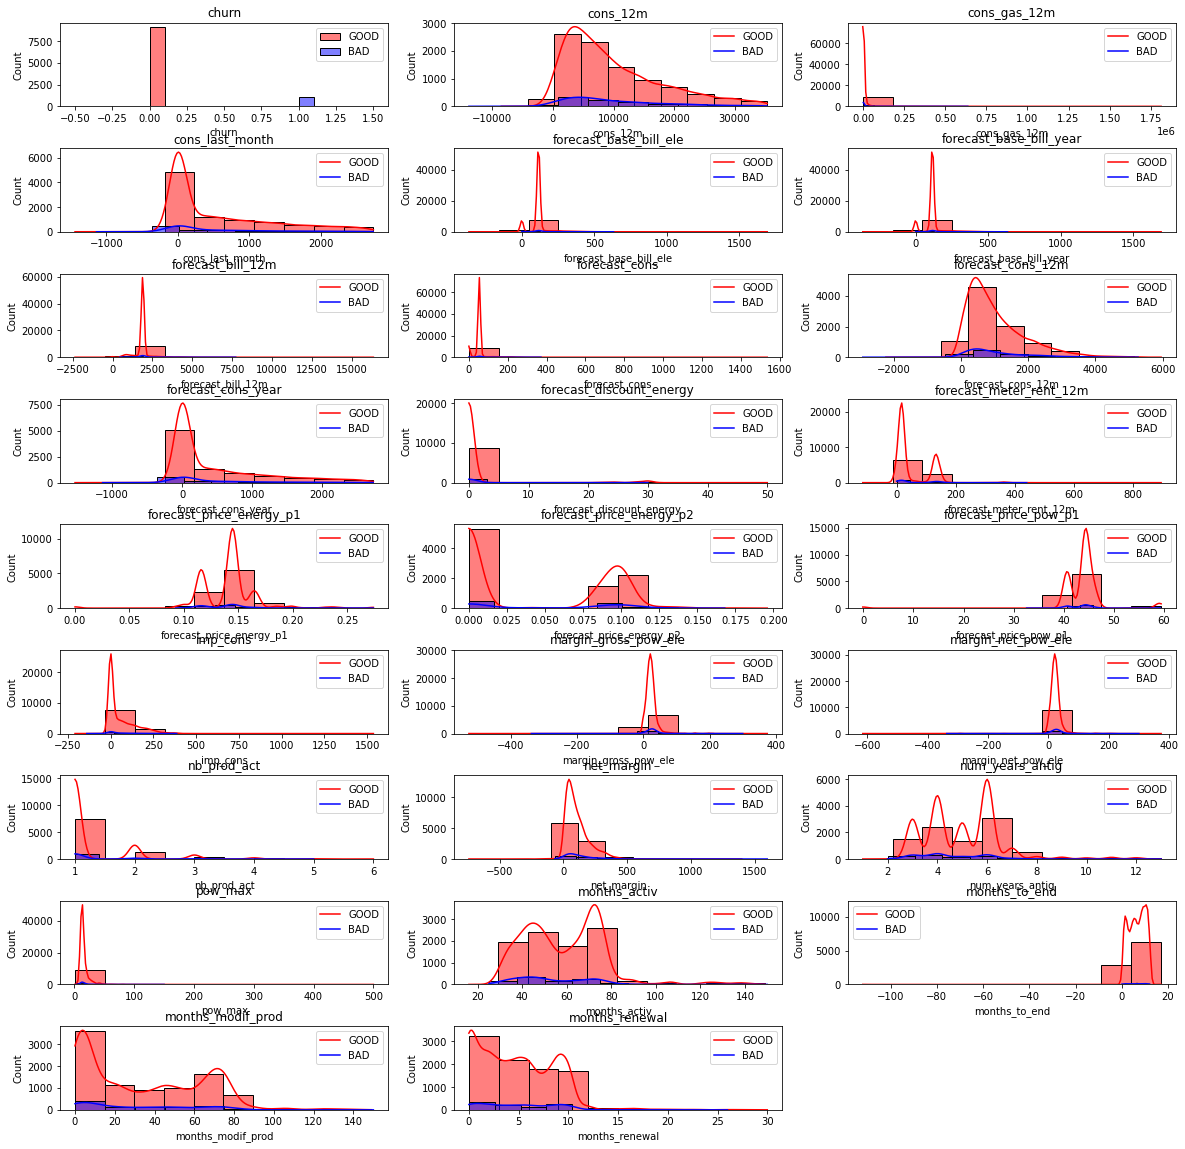

In [33]:
def _distribution_numeric(num_cols, row=9, col=3, figsize=(20, 15), bins = 10):
    print('number of numeric field: ', len(num_cols))
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(num_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(num_cols[i-1], bins = bins)
        plt.title(num_cols[i-1])
      except:
        break

_distribution_numeric(num_cols, row=9, col=3, figsize=(20, 20), bins = 10)

In [63]:
# #Đối với biến phân loại
# import seaborn as sns
# import matplotlib.pyplot as plt

# def _plot_bar_classes(col, figsize=(8, 5)):
#     train.groupby('churn')[col].value_counts().unstack().plot.bar(figsize=figsize)

# for i in range(1, len(cat_cols)+1, 1):
#   _plot_bar_classes(cat_cols[i-1])
#   plt.title(cat_cols[i-1])

In [117]:
train.columns.values

array(['id', 'churn', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'activity_new:ckfxocssowaeipxueikxcmaxdmcduxsa',
       'activity_new:cwofmuicebbcmiaaxufmfimpowpacobu',
       'activity_new:fmwdwsxillemwbbwelxsampiuwwpcdcb',
       'activity_new:kkklcdamwfafdcfwofuscwfwadblfmce',
       'activity_new:wxemiwkumpibllwklfbcooafckufkdlm',
       'channel_sales:epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_sales:ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales:fixdbufsefwooaasfcxdxadsiekoceaa',
       'channel_sales:foosdfpfkusacimwkcsosb

# TASK 4

Recall that one of the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it would be possible to predict customers likely to churn using a predictive model.

The client also wants to try a discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

Build your models and test them while keeping in mind you would need data to prove/disprove the hypotheses, as well as to test the effect of a 20% discount on customers at high propensity to churn.

Objectives:

Sub-Task 1: Build churn model(s) to try to predict the churn probability of any customer, taking into account all the explanatory variables you have constructed in the feature engineering process.

Sub-Task 2: Evaluate your model, using a holdout set, and with metrics of your choosing. Be sure to pick a metric that would make sense for this business case.

Sub-Task 3: Interpret the results and use them to formulate your answers to the client’s hypotheses and questions. You will be asked to form these answers into coherent thoughts and recommendations in the next module.

Please note, there are multiple ways to approach the task and that the sample answer is just one way to do it.

In [118]:
train = pd.merge(train, features, on="id")
train

,id,churn,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,...,months_renewal,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,1,0,54946,0,114.964827,114.964827,1890.684938,53.48847,0.00,...,6,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,114.964827,114.964827,1890.684938,53.48847,189.95,...,4,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000
2,764c75f661154dac3a6c254cd082ea7d,0,544,0,0,114.964827,114.964827,1890.684938,53.48847,47.96,...,8,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000
3,bba03439a292a1e166f80264c16191cb,0,1584,0,0,114.964827,114.964827,1890.684938,53.48847,240.04,...,9,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,114.964827,114.964827,1890.684938,53.48847,445.75,...,9,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,18463073fb097fc0ac5d3e040f356987,0,32270,47940,0,114.964827,114.964827,1890.684938,53.48847,4648.01,...,19,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000
10169,d0a6f71671571ed83b2645d23af6de00,1,7223,0,181,68.640000,68.640000,1254.650000,15.94000,631.69,...,4,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,59.122473,36.488785,8.416235
10170,10e6828ddd62cbcf687cb74928c4c2d2,1,1844,0,179,114.964827,114.964827,1890.684938,53.48847,190.39,...,10,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
10171,1cf20fd6206d7678d5bcafd28c53b4db,0,131,0,0,114.964827,114.964827,1890.684938,53.48847,19.34,...,4,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000


In [119]:
#DROP VARIABLES DUE TO MULTICOLLINEARITY

In [120]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                print("Removed:", colname, " multicollinerity")
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return dataset

In [121]:
train = correlation(train,0.7)

Removed: forecast_base_bill_year  multicollinerity
Removed: forecast_cons  multicollinerity
Removed: forecast_cons_12m  multicollinerity
Removed: forecast_cons_year  multicollinerity
Removed: forecast_price_energy_p2  multicollinerity
Removed: imp_cons  multicollinerity
Removed: has_gas:t  multicollinerity
Removed: months_activ  multicollinerity
Removed: mean_year_price_p1_var  multicollinerity
Removed: mean_year_price_p2_var  multicollinerity
Removed: mean_year_price_p3_var  multicollinerity
Removed: mean_year_price_p1_fix  multicollinerity
Removed: mean_year_price_p2_fix  multicollinerity
Removed: mean_year_price_p3_fix  multicollinerity
Removed: mean_year_price_p1  multicollinerity
Removed: mean_year_price_p2  multicollinerity
Removed: mean_year_price_p3  multicollinerity


# TRAIN TEST SPLIT

In [122]:
from sklearn.model_selection import train_test_split

In [124]:
df = train.drop(cat_cols, axis = 1)
df = train.drop('id', axis = 1)
cat_cols = df.select_dtypes('object').columns
df

,churn,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_bill_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_pow_p1,...,channel_sales:usilxuppasemubllopkaafesmlibmsdf,has_gas:f,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,months_to_end,months_modif_prod,months_renewal
0,1,0,54946,0,114.964827,1890.684938,0.0,1.78,0.114481,40.606701,...,0,0,0,0,0,1,0,5,2,6
1,0,4660,0,0,114.964827,1890.684938,0.0,16.27,0.145711,44.311378,...,0,1,0,1,0,0,0,7,76,4
2,0,544,0,0,114.964827,1890.684938,0.0,38.72,0.165794,44.311378,...,0,1,0,1,0,0,0,3,68,8
3,0,1584,0,0,114.964827,1890.684938,0.0,19.83,0.146694,44.311378,...,0,1,0,1,0,0,0,2,69,9
4,0,4425,0,526,114.964827,1890.684938,0.0,131.73,0.116900,40.606701,...,0,1,0,1,0,0,0,2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0,32270,47940,0,114.964827,1890.684938,0.0,18.57,0.138305,44.311378,...,0,0,0,0,0,1,0,4,7,19
10169,1,7223,0,181,68.640000,1254.650000,0.0,144.03,0.100167,58.995952,...,0,1,0,0,0,1,0,7,40,4
10170,1,1844,0,179,114.964827,1890.684938,0.0,129.60,0.116900,40.606701,...,0,1,0,0,0,1,0,1,46,10
10171,0,131,0,0,114.964827,1890.684938,0.0,7.18,0.145711,44.311378,...,0,1,0,0,0,1,0,7,40,4


In [125]:
y = df["churn"]
X = df.drop(labels = ["churn"],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = df['churn'])
X_train

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_bill_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_pow_p1,margin_gross_pow_ele,...,channel_sales:usilxuppasemubllopkaafesmlibmsdf,has_gas:f,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,months_to_end,months_modif_prod,months_renewal
1081,2998,0,511,114.964827,1890.684938,0.0,15.83,0.141434,44.311378,7.80,...,0,1,0,1,0,0,0,9,4,2
3924,12180,0,2027,114.964827,1890.684938,0.0,16.26,0.141434,44.311378,13.40,...,0,1,0,1,0,0,0,8,5,3
10108,6518,0,0,114.964827,1890.684938,0.0,15.09,0.144902,44.311378,9.92,...,0,1,0,1,0,0,0,9,75,2
9669,6515,0,631,114.964827,1890.684938,30.0,13.79,0.198096,46.305378,26.64,...,0,1,0,0,0,1,0,7,4,16
6090,14353,0,0,114.964827,1890.684938,0.0,6.84,0.143478,44.311378,3.12,...,1,1,0,1,0,0,0,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,18725,0,0,114.964827,1890.684938,0.0,16.25,0.147506,45.806878,26.20,...,0,1,0,1,0,0,0,9,62,2
5676,7330,0,697,176.340000,1873.060000,0.0,143.24,0.114586,40.606701,49.44,...,0,1,0,0,0,1,0,2,21,9
3097,225,0,0,0.000000,534.280000,0.0,20.54,0.144902,44.311378,24.42,...,0,1,0,0,0,1,0,4,43,7
1958,3695,0,705,114.964827,1890.684938,0.0,19.69,0.142649,44.311378,32.88,...,0,1,0,0,0,1,0,1,0,10


In [126]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(8138, 36) (8138,)
(2035, 36) (2035,)


In [127]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']

# TRANSFORM DATA USING MINMAXSCALER

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)

[[0.34273196 0.00167145 0.46727404 ... 0.9379845  0.02666667 0.06896552]
 [0.52898698 0.00167145 0.83073603 ... 0.93023256 0.03333333 0.10344828]
 [0.41413445 0.00167145 0.34476145 ... 0.9379845  0.5        0.06896552]
 ...
 [0.28648221 0.00167145 0.34476145 ... 0.89922481 0.28666667 0.24137931]
 [0.35687046 0.00167145 0.51378566 ... 0.87596899 0.         0.34482759]
 [0.37171893 0.00167145 0.3800048  ... 0.9379845  0.02666667 0.06896552]]


# USING LOGISTIC/XGBOOST, choosing final model base on accuracy ratio

In [75]:
#LOGISTIC REGRESSION

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression(max_iter=1000) # iteration # Thiết lập mô hình
model.fit(X_train, y_train) # Xây dựng mô hình
y_train_pred = model.predict(X_train) 
y_pred = model.predict(X_test) # Kiểm chứng mô hình
# accuracy
accuracy = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)
print('accuracy on train', accuracy)
print('accuracy on test', accuracy_test)


accuracy on train 0.899729663307938
accuracy on test 0.8383292383292383


In [130]:
coeff_df["Correlation"] = pd.Series(model.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
9,margin_net_pow_ele,2.513611
12,num_years_antig,2.268927
10,nb_prod_act,1.467739
6,forecast_price_energy_p1,1.391794
31,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,0.622740
3,forecast_bill_12m,0.531665
17,activity_new:kkklcdamwfafdcfwofuscwfwadblfmce,0.406050
8,margin_gross_pow_ele,0.403849
30,origin_up:lxidpiddsbxsbosboudacockeimpuepw,0.367279
27,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,0.244019


# XGBoost classifier

In [133]:
y = df["churn"]
X = df.drop(labels = ["churn"],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = df['churn'])
X_train

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_bill_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_pow_p1,margin_gross_pow_ele,...,channel_sales:usilxuppasemubllopkaafesmlibmsdf,has_gas:f,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,months_to_end,months_modif_prod,months_renewal
5497,8976,0,0,114.964827,1890.684938,0.0,15.23,0.144902,44.311378,12.82,...,0,1,0,1,0,0,0,8,75,3
9641,29489,0,2619,114.964827,1890.684938,0.0,132.10,0.115237,41.105201,24.50,...,0,1,0,1,0,0,0,11,72,0
9834,835,0,0,114.964827,1890.684938,0.0,13.80,0.165354,46.305378,20.42,...,0,1,0,1,0,0,0,11,2,0
3634,10026,19143,817,114.964827,1890.684938,0.0,131.01,0.115174,40.606701,21.56,...,0,0,0,0,1,0,0,6,77,5
5510,1009,0,0,0.000000,626.680000,0.0,0.00,0.145711,44.311378,24.42,...,0,1,0,1,0,0,0,4,67,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,19481,0,1637,114.964827,1890.684938,0.0,130.32,0.115174,40.606701,36.64,...,0,1,0,0,0,1,0,5,66,6
3007,4826,0,0,114.964827,1890.684938,0.0,16.47,0.166950,44.311378,16.92,...,1,1,0,1,0,0,0,5,54,6
642,47,0,0,114.964827,1890.684938,0.0,131.35,0.114481,40.606701,36.21,...,0,1,0,0,1,0,0,4,27,7
6586,25596,0,1148,114.964827,1890.684938,0.0,131.77,0.099462,58.995952,-4.70,...,0,1,0,0,1,0,0,11,1,0


In [134]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

#instantiate model and train
xgb = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
xgb.fit(X_train, y_train)

# make predictions for test set
y_train_predict = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy: %.2f%%" % (accuracy_test * 100.0))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.80%
Accuracy: 90.52%


In [135]:
X_train = pd.DataFrame(X_train)
X_train

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_bill_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_pow_p1,margin_gross_pow_ele,...,channel_sales:usilxuppasemubllopkaafesmlibmsdf,has_gas:f,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp,months_to_end,months_modif_prod,months_renewal
5497,8976,0,0,114.964827,1890.684938,0.0,15.23,0.144902,44.311378,12.82,...,0,1,0,1,0,0,0,8,75,3
9641,29489,0,2619,114.964827,1890.684938,0.0,132.10,0.115237,41.105201,24.50,...,0,1,0,1,0,0,0,11,72,0
9834,835,0,0,114.964827,1890.684938,0.0,13.80,0.165354,46.305378,20.42,...,0,1,0,1,0,0,0,11,2,0
3634,10026,19143,817,114.964827,1890.684938,0.0,131.01,0.115174,40.606701,21.56,...,0,0,0,0,1,0,0,6,77,5
5510,1009,0,0,0.000000,626.680000,0.0,0.00,0.145711,44.311378,24.42,...,0,1,0,1,0,0,0,4,67,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,19481,0,1637,114.964827,1890.684938,0.0,130.32,0.115174,40.606701,36.64,...,0,1,0,0,0,1,0,5,66,6
3007,4826,0,0,114.964827,1890.684938,0.0,16.47,0.166950,44.311378,16.92,...,1,1,0,1,0,0,0,5,54,6
642,47,0,0,114.964827,1890.684938,0.0,131.35,0.114481,40.606701,36.21,...,0,1,0,0,1,0,0,4,27,7
6586,25596,0,1148,114.964827,1890.684938,0.0,131.77,0.099462,58.995952,-4.70,...,0,1,0,0,1,0,0,11,1,0


# FEATURE IMPORTANCE

<BarContainer object of 36 artists>

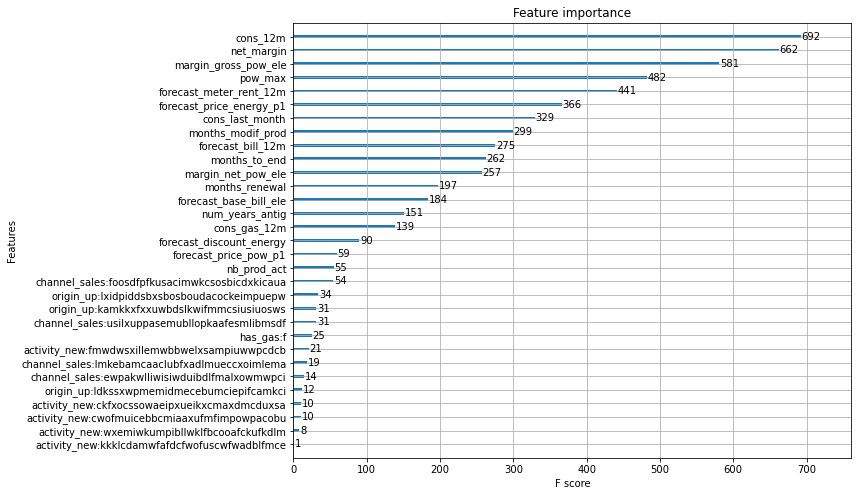

In [136]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
ax = plot_importance(xgb)
ax.figure.set_size_inches(10,8)
plt.barh(X_train.columns, xgb.feature_importances_)

# MODEL EVALUATION

In [137]:
def evaluate(model, X_test, y_test):
    """
    Evaluate the accuracy, precision and recall of a model
    """
    # Get the model predictions
    y_pred = xgb.predict(X_test)
#     auc_roc_score = metrics.roc_auc_score(y_test, y_pred) 
#     gini = 2 * auc_roc_score - 1
    # Print the evaluation metrics as pandas dataframe
    results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test, y_pred)* 100.0],
    "Precision" : [metrics.precision_score(y_test, y_pred)* 100.0],
    "Recall" : [metrics.recall_score(y_test, y_pred)* 100.0]})
    # For a more detailed report
    #print(metrics.classification_report(y_test_, prediction_test_))
    return results

In [138]:
evaluate(xgb, X_test, y_test)

,Accuracy,Precision,Recall
0,90.515971,73.913043,8.333333


# ROC CURVE

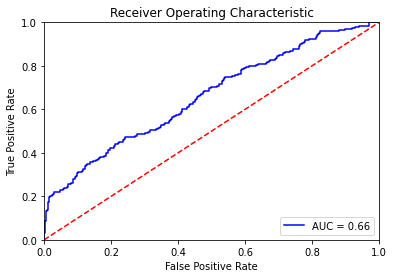

In [139]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()